In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
from sklearn.datasets import make_classification
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
# Read the CSV file into a pandas DataFrame
spotify_df = pd.read_csv('sample_data.csv')
spotify_df.head()

,Country,Uri,Popularity,Title,Artist,Album/Single,Genre,Artist_followers,Explicit,Album,...,speechiness,acoustics,instrumentalness,liveliness,valence,tempo,duration_ms,time_signature,Genre_new,Days_since_release
0,New Zealand,https://open.spotify.com/track/5v7h5vQgCJKZT5v...,68931.10,in the air,L.A.B.,0,nz reggae,60018,1,L.A.B. III,...,0.0452,0.1050,0.001410,0.0833,0.967,117.985,252680,4,reggae,344.0
1,Finland,https://open.spotify.com/track/1z4jCtA9thODROr...,68943.35,japanese drip,Kube - Cledos,0,finnish dance pop,34265,1,Hakunila Killah,...,0.2040,0.0433,0.004550,0.1060,0.152,109.023,164588,4,pop,428.0
2,France,https://open.spotify.com/track/7gXWIxX7rUtKGNt...,4980.00,mamamia,RIDSA,0,francoton,438505,1,Libre,...,0.0824,0.1050,0.000005,0.1020,0.770,128.020,228760,4,indie,1307.0
3,France,https://open.spotify.com/track/6sO5rB2K8fIJVt1...,4190.80,amigo,Jul,0,francoton,3127974,1,La tête dans les nuages,...,0.0827,0.1880,0.000002,0.0949,0.625,126.995,174853,4,indie,1079.0
4,Austria,https://open.spotify.com/track/40WQl2fD6jTAV2z...,114.75,sie will zu mir,Yung Hurn,0,german hip hop,326465,1,Y,...,0.1420,0.1110,0.000002,0.1690,0.652,130.056,180693,4,hip hop,372.0


In [30]:
# Assign the data to X and y\
y = spotify_df["Genre_new"]
X = spotify_df[['Artist_followers','Popularity','tempo','duration_ms','danceability', 'energy', 'key', 'speechiness', 'acoustics', 'instrumentalness', 'liveliness', 'valence']].copy()

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [32]:
# Fit a Random Forests classifier to the data
clf = RandomForestClassifier(random_state=1, n_estimators=500).fit(X_train_scaled, y_train)
print(f'Training Score: {clf.score(X_train_scaled, y_train)}')
print(f'Testing Score: {clf.score(X_test_scaled, y_test)}')

Training Score: 1.0
Testing Score: 0.9183673469387755


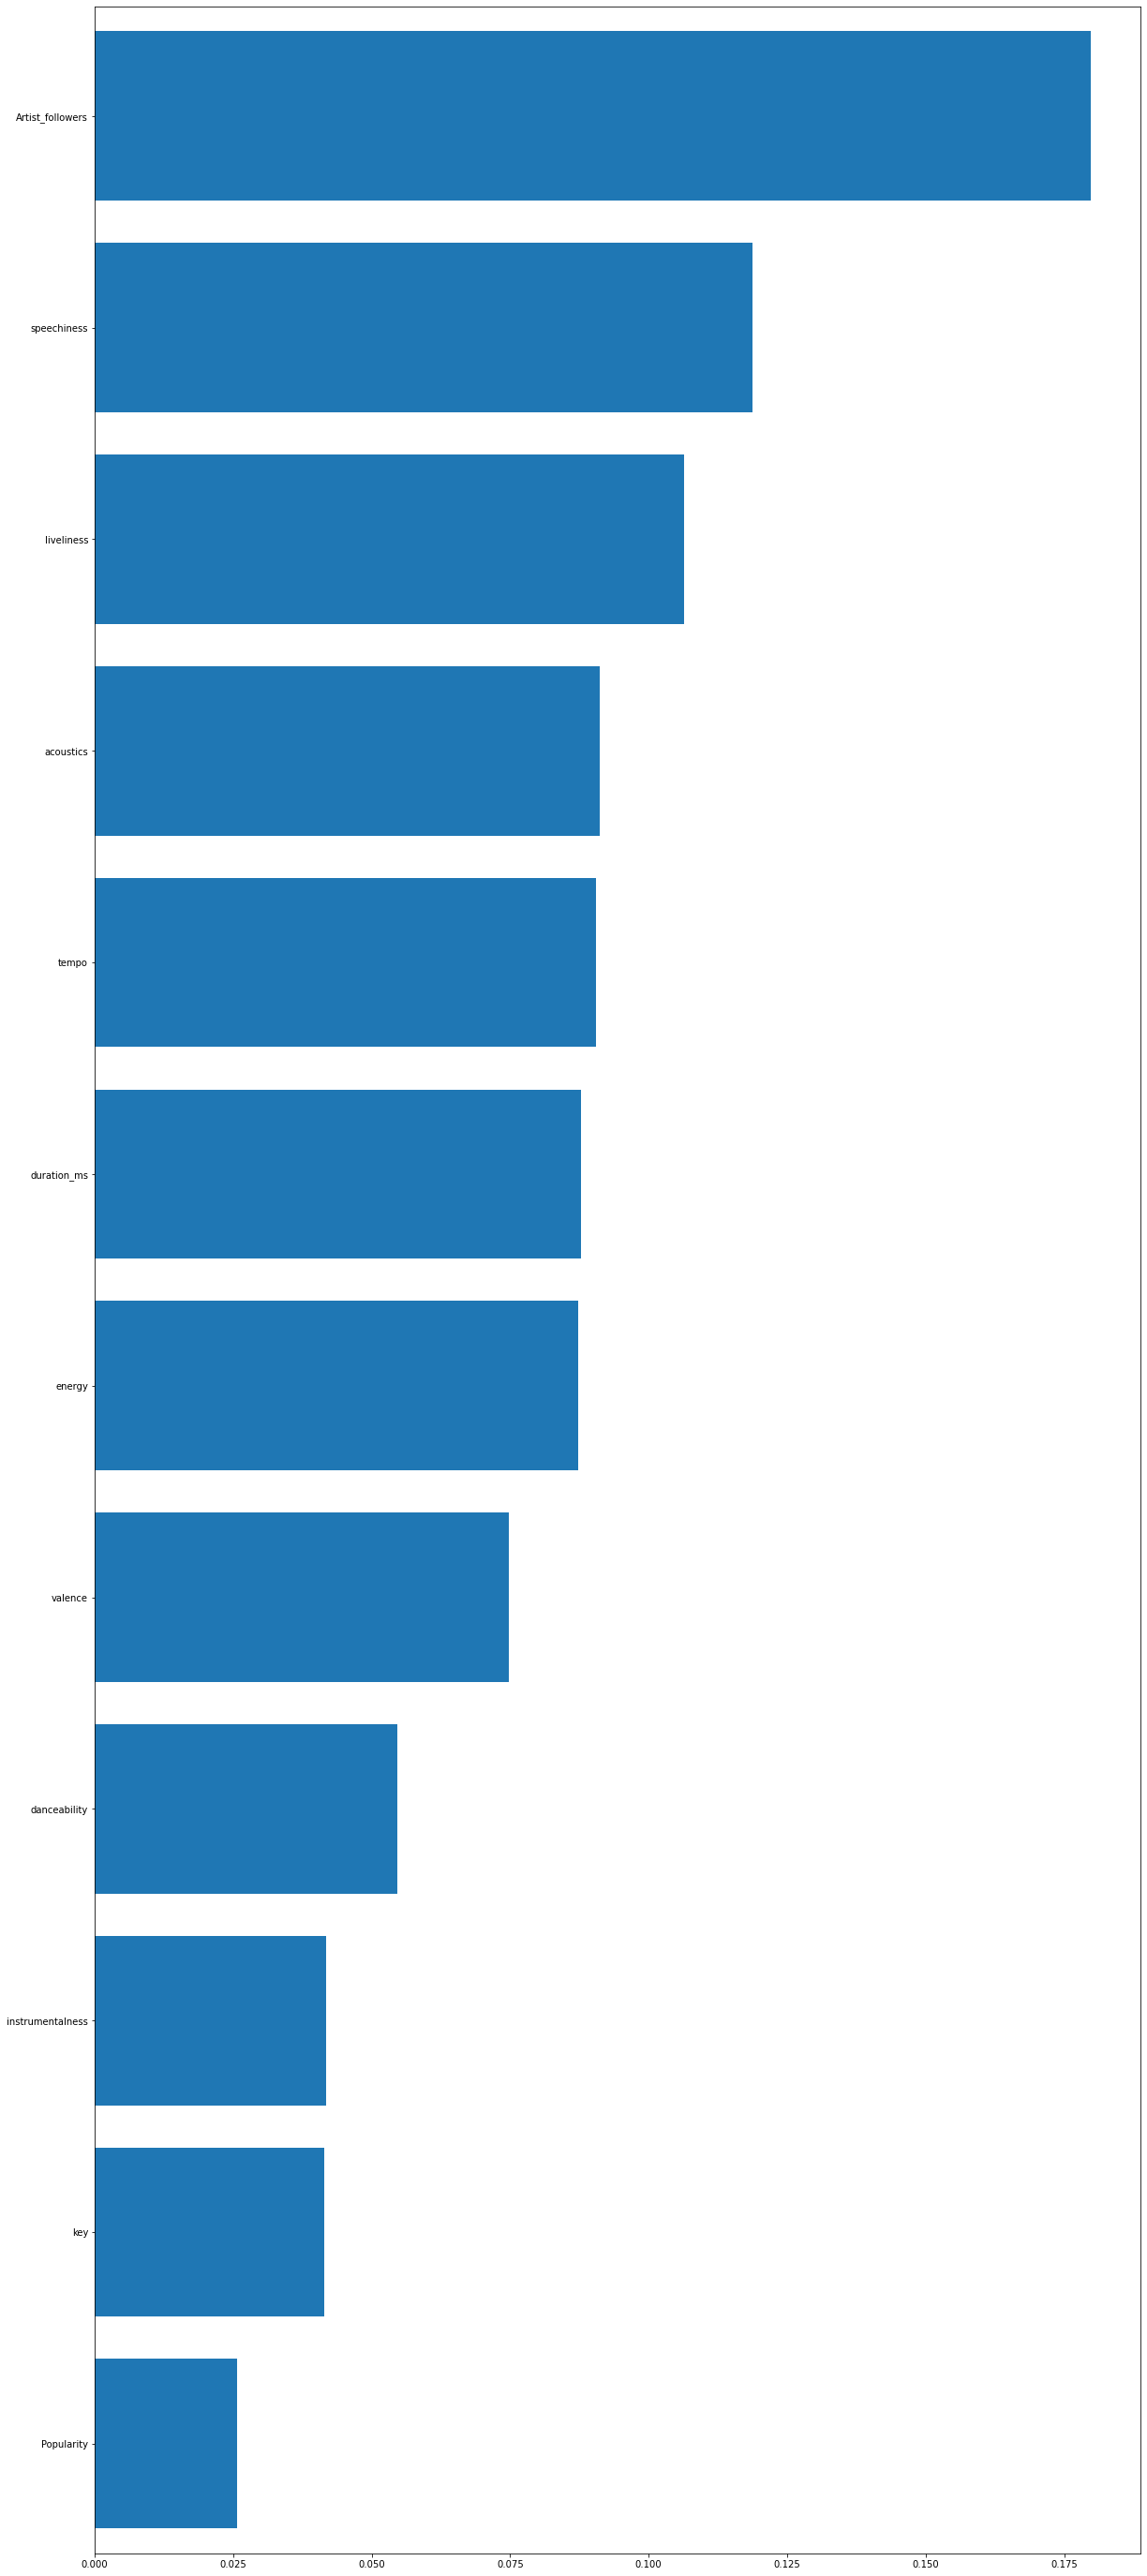

In [42]:
# Use the following code to plot the most important features
feature_importances = clf.feature_importances_
features = sorted(zip(X.columns, feature_importances), key = lambda x: x[1])
cols = [f[0] for f in features]
width = [f[1] for f in features]

fig, ax = plt.subplots()

fig.set_size_inches(20,50)
plt.margins(y=0.01)

ax.barh(y=cols, width=width)

plt.show()

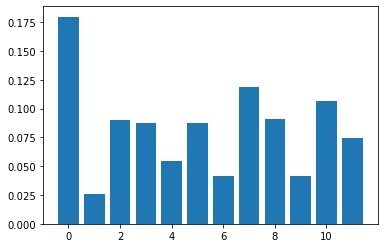

In [45]:
features = clf.feature_importances_
plt.bar(x = range(len(features)), height=features)
plt.show()